# Import Packages

In [46]:
#packages for importing data
import pandas as pd
#packages for Granger causality
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
#packages for PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#packages for PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [84]:
#load data
df = pd.read_csv("all_data.csv")
#create second dataset with year as index
all_data = df.set_index('year')
all_data.drop(all_data.tail(2).index,inplace = True)

# Section 1: Granger Causality 

## Check if Stationary

### Plot the Data

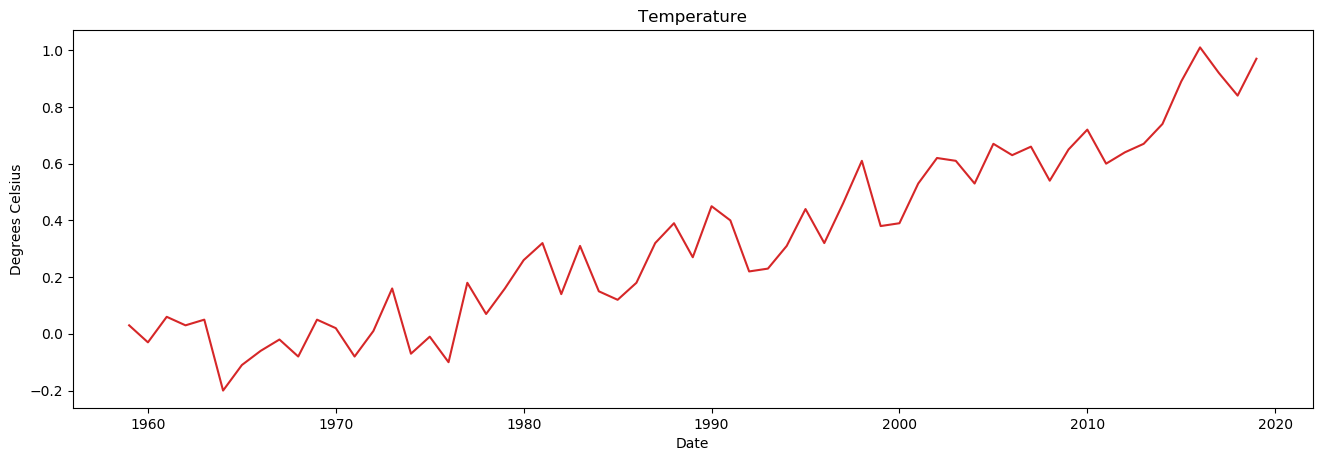

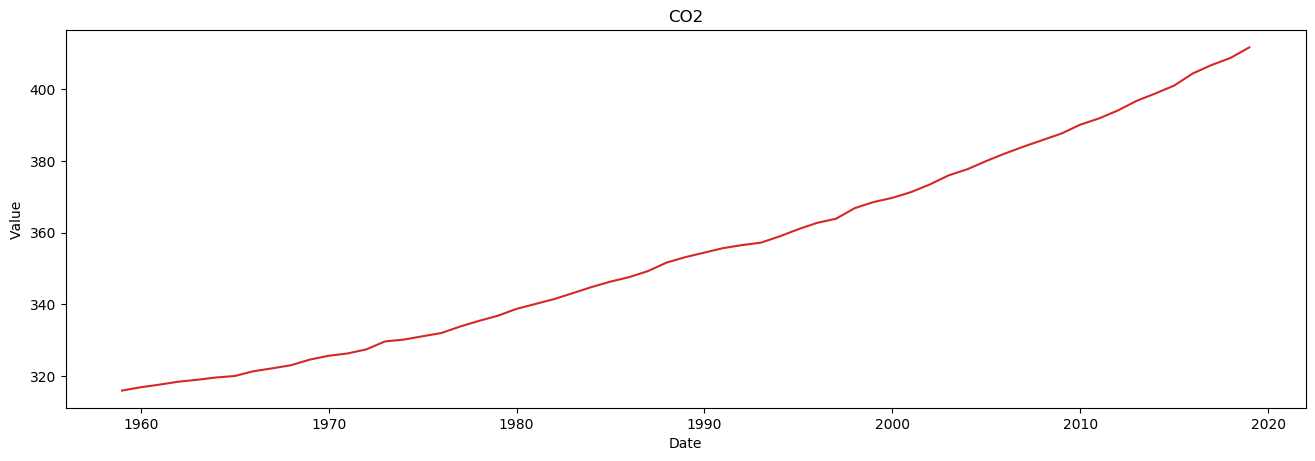

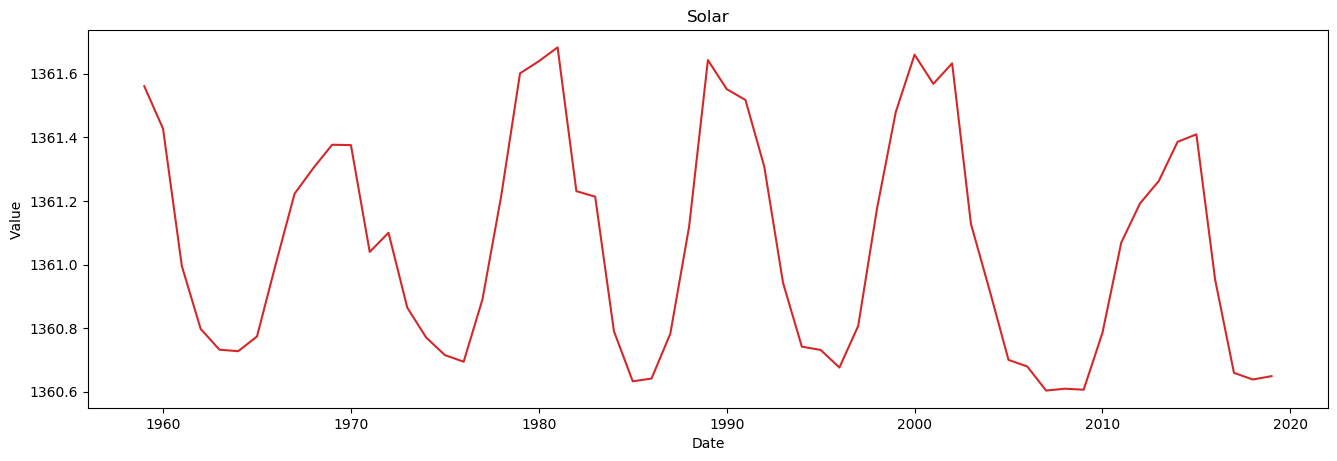

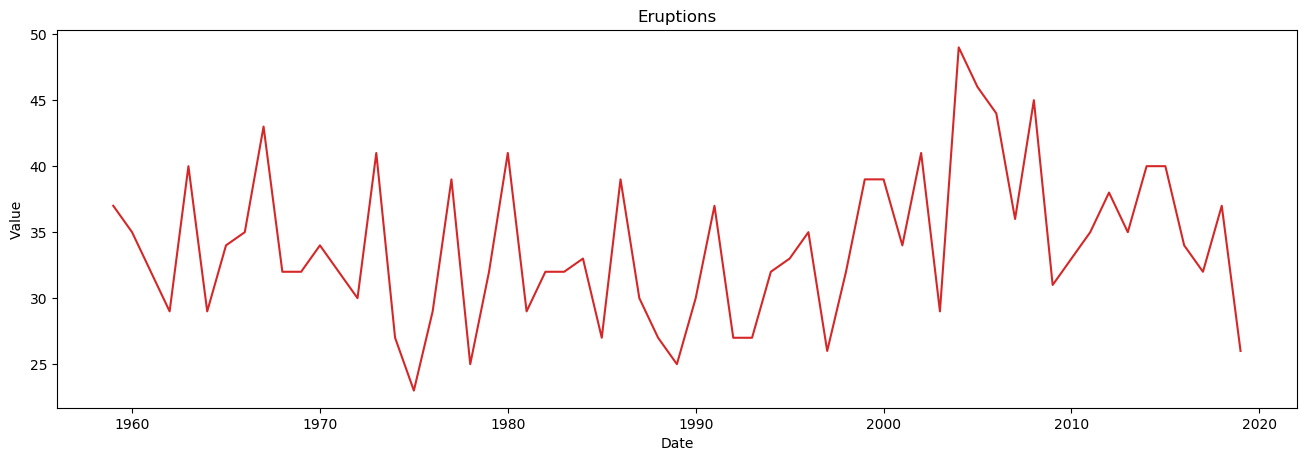

In [48]:
#create function to plot variables over time
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
# set figure size and number of dots
    plt.figure(figsize=(16,5), dpi=dpi)
# plot input variables in red
    plt.plot(x, y, color='tab:red')
# set title and axis labels
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
# return plot
    plt.show()

# Temperature
plot_df(all_data, x=all_data.index, y=all_data.avg_temp, title='Temperature', ylabel = "Degrees Celsius")
# CO2
plot_df(all_data, x=all_data.index, y=all_data.co2, title='CO2')
#Solar
plot_df(all_data, x=all_data.index, y=all_data.TSI, title='Solar')
#Eruptions
plot_df(all_data, x=all_data.index, y=all_data.eruptions, title='Eruptions')

### Augmented Dickey Fuller Test

In [85]:
# Create function for Augmented Dickey Fuller Test
def Augmented_Dickey_Fuller(result):
    #f-test
    print(f'Test Statistics: {result[0]}')
    #p-value
    print(f'p-value: {result[1]}')
    #critical values
    print(f'critical_values: {result[4]}')

# if the p-value is greater than 0.05, the series is not stationary, if not, the series is stationary
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

Augmented Dickey-Fuller test \
Null Hypothesis: Series has a unit root and is non-stationary \
Alternative Hypothesis: Series has no unit root and is stationary 

In [50]:
# Temperature
# Augmented Dickey-Fuller test
result = adfuller(all_data['avg_temp'])
Augmented_Dickey_Fuller(result)

Test Statistics: 1.5627709852917853
p-value: 0.9977414740512563
critical_values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
Series is not stationary


In [51]:
# CO2
# Augmented Dickey-Fuller test
result = adfuller(all_data['co2'])
Augmented_Dickey_Fuller(result)

Test Statistics: 5.535546014723031
p-value: 1.0
critical_values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Series is not stationary


In [52]:
# Solar
# Augmented Dickey-Fuller test
result = adfuller(all_data['TSI'])
Augmented_Dickey_Fuller(result)

Test Statistics: -6.606529864751653
p-value: 6.5355446428221305e-09
critical_values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Series is stationary


In [53]:
# Eruptions
# Augmented Dickey-Fuller test
result = adfuller(all_data['eruptions'])#
Augmented_Dickey_Fuller(result)

Test Statistics: -2.004059600856877
p-value: 0.284795947417378
critical_values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Series is not stationary


Temperature, CO2 and Eruptions are not stationary. We will transform our data through differentiation to make it stationary and suitable for the granger causality test.

## First Differentiation

### Data Transformation

In [54]:
# Differentiate the data
all_data_transformed = all_data.diff().dropna()

### Plot the Data

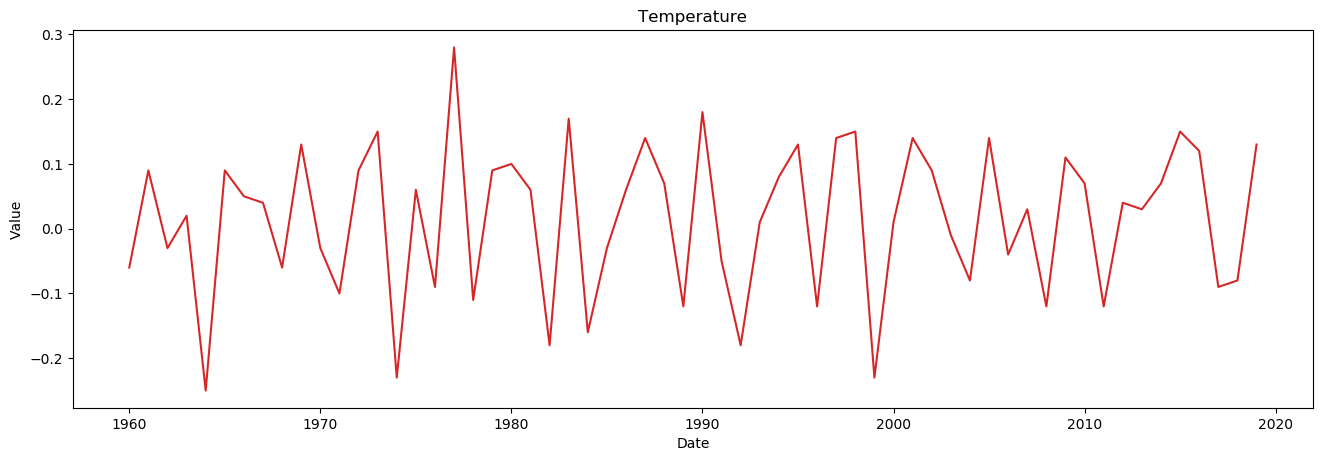

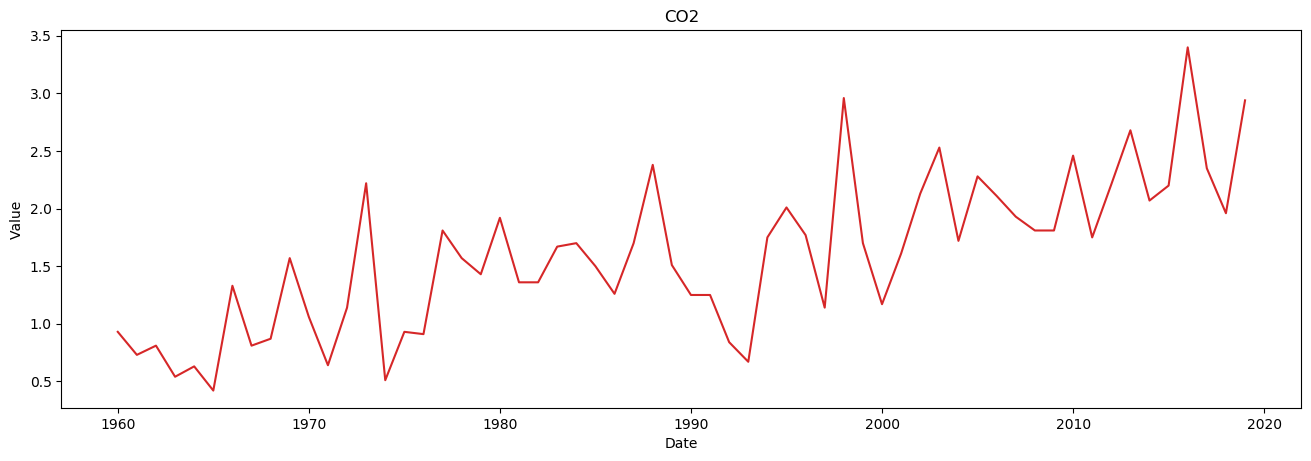

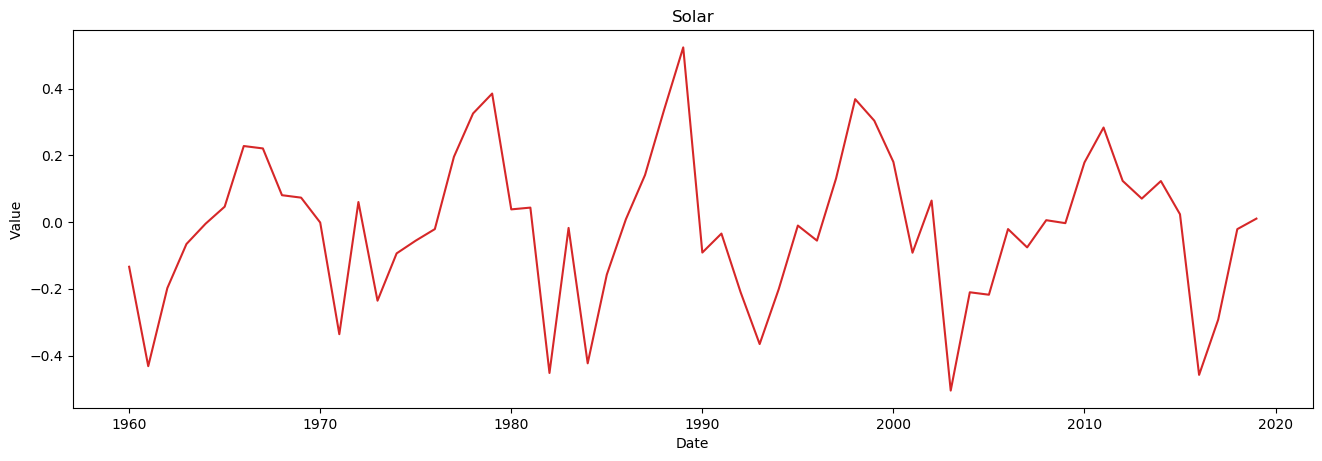

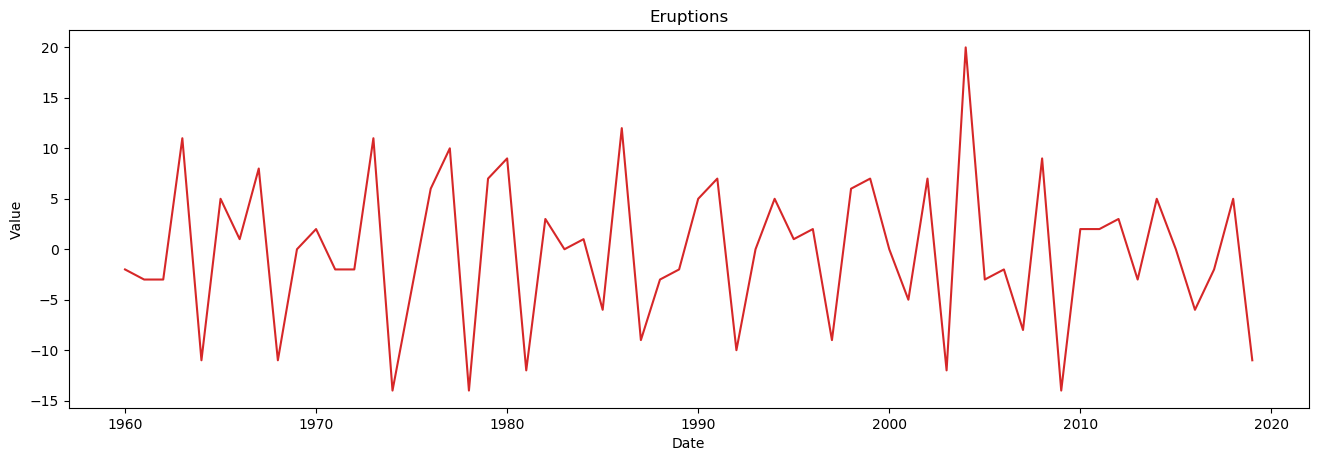

In [55]:
# Draw Plot
# Temperature
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.avg_temp, title='Temperature')
# CO2
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.co2, title='CO2')
# Solar
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.TSI, title='Solar')
# Eruptions
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.eruptions, title='Eruptions')

### Augmented Dickey Fuller Test

In [56]:
# Temperature
result = adfuller(all_data_transformed['avg_temp'])
Augmented_Dickey_Fuller(result)

Test Statistics: -3.925855131436487
p-value: 0.0018525959932109326
critical_values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
Series is stationary


In [57]:
# CO2
result = adfuller(all_data_transformed['co2'])
Augmented_Dickey_Fuller(result)

Test Statistics: -0.5182742029257346
p-value: 0.888400805388891
critical_values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Series is not stationary


In [58]:
# Solar
result = adfuller(all_data_transformed['TSI'])
Augmented_Dickey_Fuller(result)

Test Statistics: -5.4155033176724245
p-value: 3.142281343704372e-06
critical_values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}
Series is stationary


In [59]:
# Eruptions
result = adfuller(all_data_transformed['eruptions'])
Augmented_Dickey_Fuller(result)

Test Statistics: -5.081242179073181
p-value: 1.528902789799515e-05
critical_values: {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}
Series is stationary


## Second Differentiation

### Data Transformation

In [60]:
# Differentiate Data
all_data_transformed = all_data_transformed.diff().dropna()
# Drop Column 1
all_data= all_data.iloc[1:]

### Plot the Data

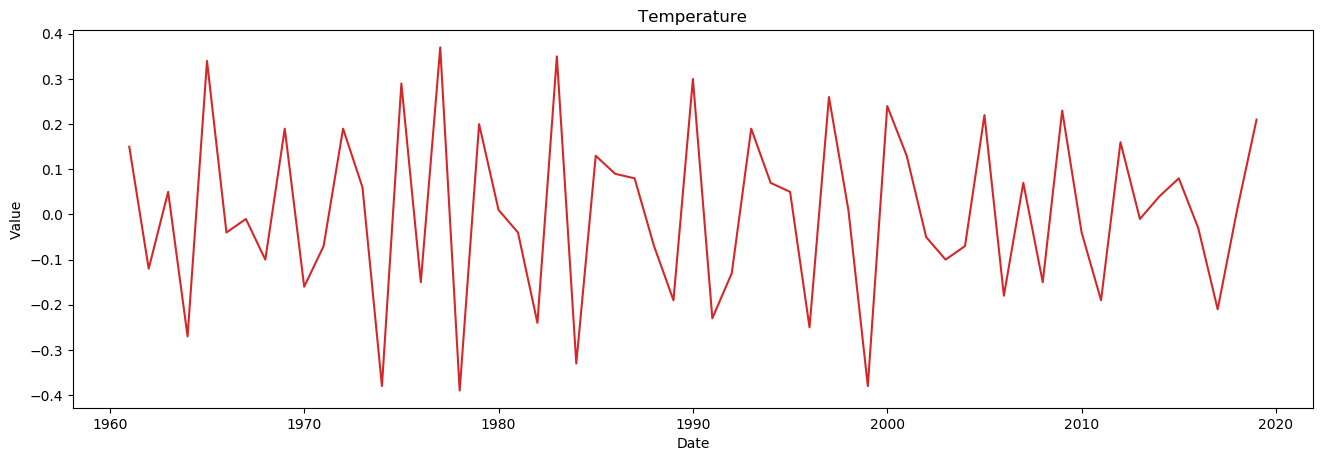

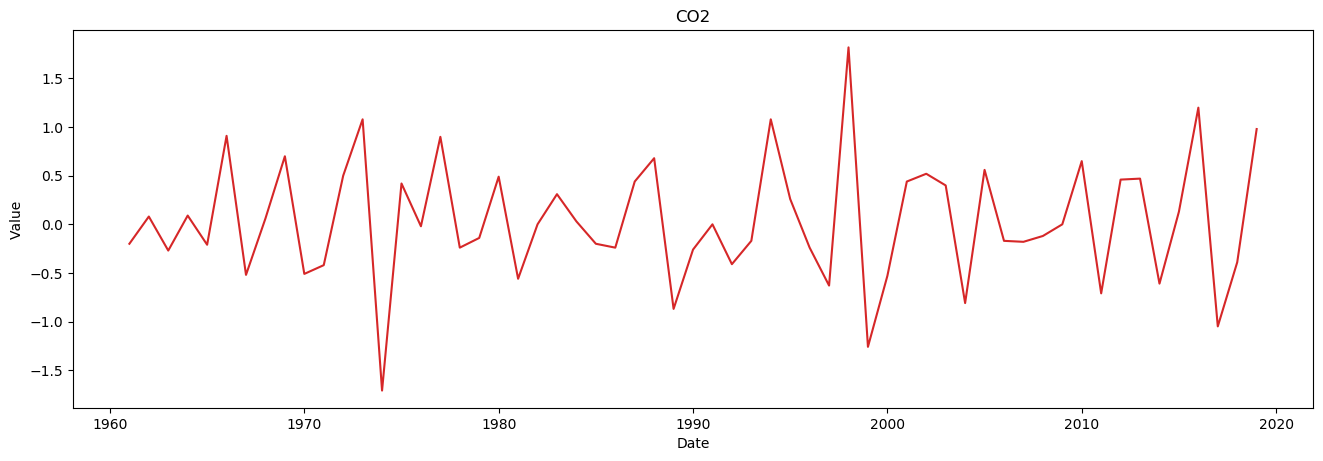

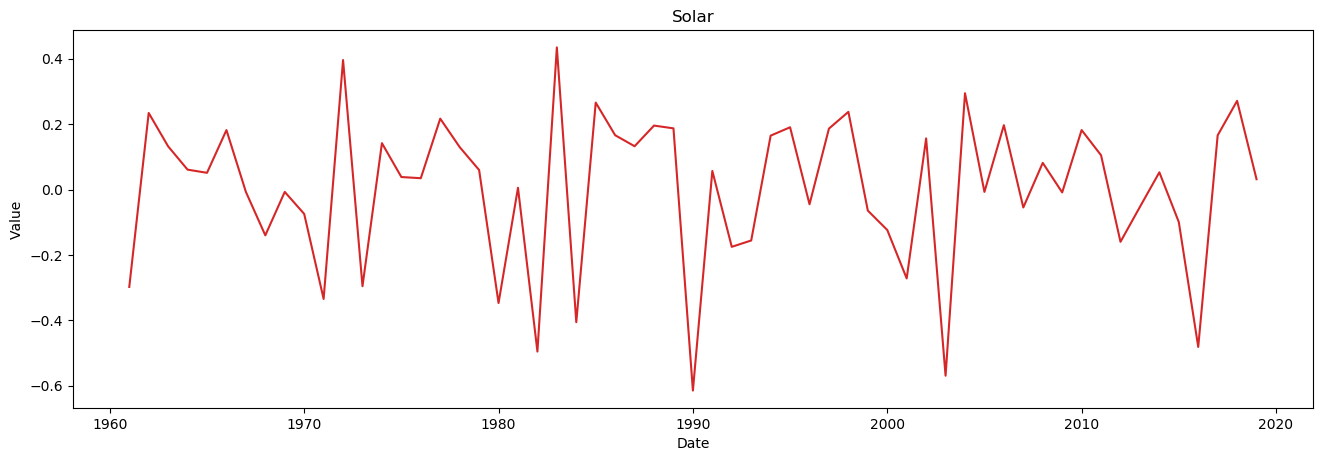

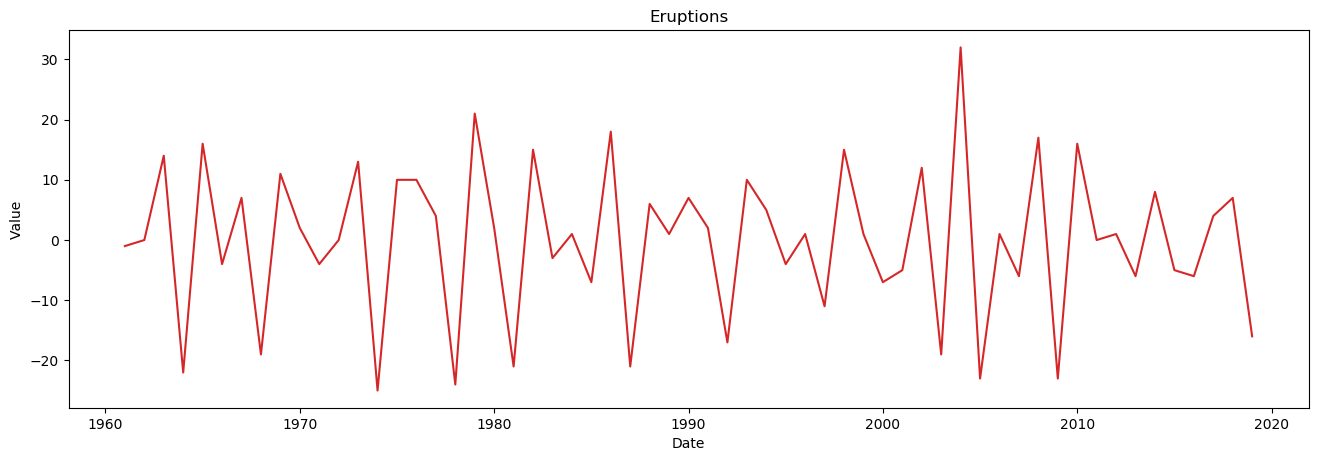

In [61]:
# Draw Plot
# Temperature
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.avg_temp, title='Temperature')
# CO2
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.co2, title='CO2')
# Solar
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.TSI, title='Solar')
# Eruptions
plot_df(all_data_transformed, x=all_data_transformed.index, y=all_data_transformed.eruptions, title='Eruptions')

### Augmented Dickey Fuller Test

In [62]:
# Temperature
result = adfuller(all_data_transformed['avg_temp'])
Augmented_Dickey_Fuller(result)

Test Statistics: -5.450846259152902
p-value: 2.6465575129204426e-06
critical_values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is stationary


In [63]:
# CO2
result = adfuller(all_data_transformed['co2'])
Augmented_Dickey_Fuller(result)

Test Statistics: -5.661315019104803
p-value: 9.365849600093322e-07
critical_values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Series is stationary


In [64]:
# Solar
result = adfuller(all_data_transformed['TSI'])
Augmented_Dickey_Fuller(result)

Test Statistics: -5.071079633954044
p-value: 1.6022810111450978e-05
critical_values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
Series is stationary


In [65]:
# Eruptions
result = adfuller(all_data_transformed['eruptions'])
Augmented_Dickey_Fuller(result)

Test Statistics: -6.567146814519578
p-value: 8.105463999641124e-09
critical_values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Series is stationary


## Choosing Number of Lags

Determine the appropriate maximum lag length for the variables using Akaike Information Criterion.

In [66]:
# create a VAR model of raw data
model = VAR(all_data) 
# for each potential lag value from 1-10
for i in [1,2,3,4,5,6,7,8,9,10]:
    # calculate the model fit of the VAR
    result = model.fit(i)
    try:
        # print number of lags
        print('Lag:', i)
        #print AIC
        print('AIC:', result.aic )
    except:
        continue

Lag: 1
AIC: -5.982755851698027
Lag: 2
AIC: -6.466876427682378
Lag:

C:\Users\jillv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


 3
AIC: -6.368923820598733
Lag: 4
AIC: -6.540747911854547
Lag: 5
AIC: -6.690182122804597
Lag: 6
AIC: -6.392832980839873
Lag: 7
AIC: -6.509247715626439
Lag: 8
AIC: -7.047995305692255
Lag: 9
AIC: -7.271170843662611
Lag: 10
AIC: -8.684952331014584


We are looking for the number of lags that gives us the lowest possible AIC. We will use a lag of 1 as this has the lowest AIC.

## Test the Granger Causality

Does CO2 cause temperature? \
Null Hupothesis: CO2 does not cause temperature \
Alternative Hypothesis: CO2 causes temperature

In [67]:
# temp and CO2
grangercausalitytests(all_data_transformed[['avg_temp', 'co2']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.2409 , p=0.0003  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=16.0722 , p=0.0001  , df=1
likelihood ratio test: chi2=14.1866 , p=0.0002  , df=1
parameter F test:         F=15.2409 , p=0.0003  , df_denom=55, df_num=1


{1: ({'ssr_ftest': (15.24086901082581, 0.00026069320074151303, 55.0, 1),
   'ssr_chi2test': (16.072189138689037, 6.0972934521280766e-05, 1),
   'lrtest': (14.186633890312208, 0.00016554226160952345, 1),
   'params_ftest': (15.24086901082584, 0.00026069320074150983, 55.0, 1.0)},
   array([[0., 1., 0.]])])}

The F test statistic turns out to be 15.2409 and the corresponding p-value is 0.0003. 

Since the p-value is less than .05, we reject the null hypothesis of the test and conclude that knowing the level of CO2 is useful for predicting the temperature.

Does TSI cause temperature? \
Null Hupothesis: TSI does not cause temperature \
Alternative Hypothesis: TSI causes temperature

In [68]:
# temp and TSI
grangercausalitytests(all_data_transformed[['avg_temp', 'TSI']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0644  , p=0.8006  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=0.0679  , p=0.7944  , df=1
likelihood ratio test: chi2=0.0679  , p=0.7944  , df=1
parameter F test:         F=0.0644  , p=0.8006  , df_denom=55, df_num=1


{1: ({'ssr_ftest': (0.06442204000237185, 0.8005849641498852, 55.0, 1),
   'ssr_chi2test': (0.06793596945704669, 0.7943660568011599, 1),
   'lrtest': (0.06789621346442232, 0.7944248840499456, 1),
   'params_ftest': (0.06442204000237202, 0.8005849641498852, 55.0, 1.0)},
   array([[0., 1., 0.]])])}

The F test statistic turns out to be 0.0644 and the corresponding p-value is 0.8006. 

Since the p-value is greater than .05, we fail to reject the null hypothesis of the test and cannot conclude that knowing the TSI is useful for predicting the temperature.

Do eruptions cause temperature? \
Null Hupothesis: eruptions do not cause temperature \
Alternative Hypothesis: eruptions cause temperature

In [69]:
# temp and eruptions
grangercausalitytests(all_data_transformed[['avg_temp', 'eruptions']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0088  , p=0.9255  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=0.0093  , p=0.9231  , df=1
likelihood ratio test: chi2=0.0093  , p=0.9231  , df=1
parameter F test:         F=0.0088  , p=0.9255  , df_denom=55, df_num=1


{1: ({'ssr_ftest': (0.00882810494981345, 0.9254839798554582, 55.0, 1),
   'ssr_chi2test': (0.009309637947076002, 0.9231342230578217, 1),
   'lrtest': (0.009308890877377962, 0.9231372976818949, 1),
   'params_ftest': (0.008828104949820314, 0.9254839798554068, 55.0, 1.0)},
   array([[0., 1., 0.]])])}

The F test statistic turns out to be 0.0088 and the corresponding p-value is 0.9255.

Since the p-value is greater than .05, we fail to reject the null hypothesis of the test and cannot conclude that knowing the number of eruptions is useful for predicting the temperature.

# Section 2: Principal Component Analysis

In [70]:
# Select TSI, co2 and eruptions as predictors
x = df.iloc[:, [1,3,4]] 
# Select temperature anomaly as response
y = df['avg_temp'] 

In [71]:
# Standardize the variables to have zero mean and unit standard deviation
x = StandardScaler().fit_transform(x)

In [72]:
# Construct PCA model using PCA() function
# Keep all components
model = PCA()
x_pca = model.fit_transform(x) 

In [73]:
# Percentage variance explained by each component
variances = model.explained_variance_ratio_
# Print variances
print(variances)

[0.39887062 0.35546677 0.24566262]


In [74]:
# Each principal component is a linear combination of the 3 features
# The importance of each feature for each of the principal components is reflected by the following matrix
print(['TSI','co2','eruptions'])
print(abs(model.components_ ))

['TSI', 'co2', 'eruptions']
[[0.51583897 0.75560677 0.40369366]
 [0.65357257 0.04245343 0.75567228]
 [0.55385291 0.65364832 0.51574299]]


Using ~0.5 as a cutoff for feature importance:
PC1 is dominated by the co2 variable.
Eruptions contribute the most to PC2, followed by TSI.
Co2 contributes the most to PC3, followed by TSI.

Roughly 75% of the variance in temperature anomaly is explained by the first two principal components. 
These principal components are dominated by co2 (PC1) and eruptions/TSI (PC2)

Text(0.5, 1.0, 'Score plot for for PC1 and PC2')

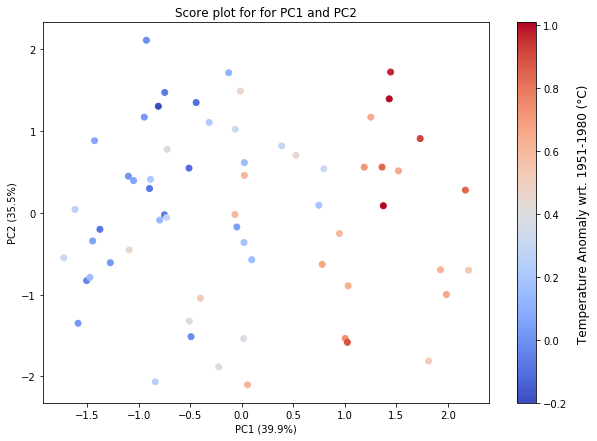

In [75]:
# PC1 and PC2 are the two directions of greatest variation in the data
# Below we produce a score plot of these components
plt.figure(figsize=(10,7)).patch.set_facecolor('xkcd:white')

plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap = 'coolwarm')
plt.xlabel('PC1 (39.9%)')
plt.ylabel('PC2 (35.5%)')
plt.colorbar().ax.set_title('Temperature Anomaly wrt. 1951-1980 (°C)', x=3.5, y=0.15,rotation = 90)
plt.title("Score plot for for PC1 and PC2")

The first principal component separates the data into two clusters. \
Left cluster contains smaller temperature values and has low values for co2.\
Right cluster contains higher temperatue values and has high values for co2.

Points that have high values for PC2 have high values for eruptions and TSI.\
But these do not seem to be clustered according to temperature.

# Section 3: Partial Least Squares Regression

In [76]:
# Select year, tsi, co2 levels and eruptions as predictors
x = df.iloc[:, [0,1,3,4]] 
# Select temperature anomaly as response
y = df['avg_temp'] 

In [77]:
# Input predictor variables x, response variable y, Number of PLS components n
def PLS(x, y, n):
    # PLS model ocject with n components
    pls = PLSRegression(n_components=n)
    # Use 10 fold cross-validation
    cv = cross_val_predict(pls, x, y, cv=10)
    # Calculate mean squared error
    mse = mean_squared_error(y, cv)

    
    return (cv, mse)

Text(0.5, 1.0, 'Mean squared error by number of PLS components')

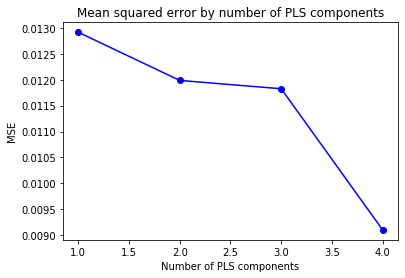

In [78]:
# values for the number of components that we will test (1-4 components)
comps = np.arange(1, 5)
# array to contain mean squared errors for each component value
mses = []

for n in comps:
    cv, mse = PLS(x, y, n)
    mses.append(mse)

plt.figure().patch.set_facecolor('xkcd:white')
plt.plot(comps, mses, 'b-' )
plt.plot(comps, mses, 'bo')

plt.xlabel('Number of PLS components')
plt.ylabel('MSE')
plt.title('Mean squared error by number of PLS components')


In [79]:
# lowest mean squared error occurs when n=4. But this is equivalent to OLS.
# Cannot use OLS due to multicolinearity
# Use statistical elbow at n = 2
model = PLSRegression(n_components=2)
# Fit it to our x and y data
model.fit(x, y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [80]:
# Get an array of PLS predictions for 1959 to 2021
temp_pred_known = model.predict(x)

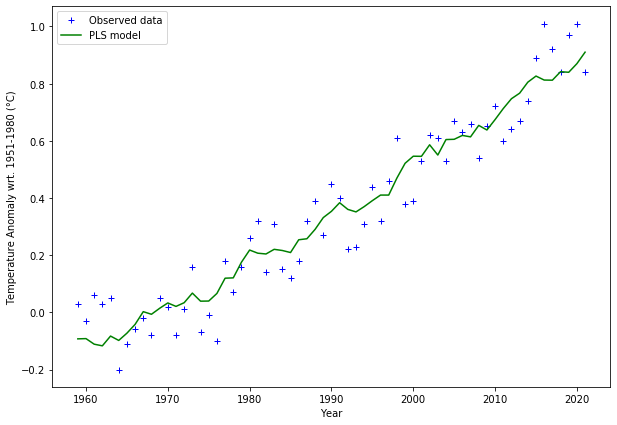

In [81]:
# Set plot background colour to white
plt.figure(figsize=(10,7)).patch.set_facecolor('xkcd:white')

# Plot observed data (temperature anomaly by year) in blue
plt.plot(df['year'],df['avg_temp'],'b+', label="Observed data")

# Plot PLS predictions from 1959 to 2032 (temperature anomaly by year) in green
plt.plot(list(df['year']), list(temp_pred_known),'g-',
        label = "PLS model")
         


# Add labels
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly wrt. 1951-1980 (°C)")
# Add legend
plt.legend()

In [82]:
# The model formula is Y = XB + E where model.coef_ is the estimate of B. X here is normalised.
# (substract mean, divide by stdev)
model.coef_

array([[0.15257011],
       [0.01951925],
       [0.15951868],
       [0.01384061]])

In [83]:
#  y_mean_ is E
model.y_mean_

array([0.34952381])